In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

Analyze_data = pd.read_csv ("Final_data.csv")
print (Analyze_data)

    Unnamed: 0 CropsM    TonnesM  US$1000M  TempChangeM  YearR  CropsRM  \
0            0  Maize  239548580  17247498        0.755      1        1   
1            1  Maize  251853900  18385335        1.000      2        1   
2            2  Maize  241376650  18827379        0.784      3        1   
3            3  Maize  227766880  20726786        0.953      4        1   
4            4  Maize  256229020  24341757        0.992      5        1   
5            5  Maize  299875570  24289921        0.866      6        1   
6            6  Maize  282262550  22298741        1.157      7        1   
7            7  Maize  267502850  32100342        1.028      8        1   
8            8  Maize  331177280  54644251        1.147      9        1   
9            9  Maize  305911450  48945832        0.215     10        1   
10          10  Maize  331921050  46468947        0.399     11        1   
11          11  Maize  315617920  64386056        0.694     12        1   
12          12  Maize  31

In [2]:
## Test for Homoscedasticity

In [3]:
## US$1000 Maize

In [4]:
x = Analyze_data['TempChangeM']
y = Analyze_data['US$1000MCUBE']
model = sm.OLS(y,x).fit()

In [5]:
pred_val = model.fittedvalues.copy()
true_val = Analyze_data['US$1000MCUBE'].values.copy()
residual = true_val - pred_val

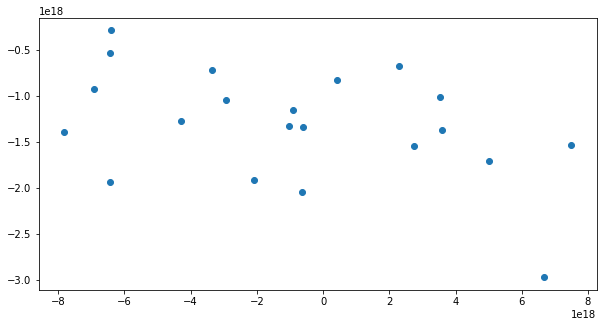

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [8]:
sms.diagnostic.het_breuschpagan(residual, Analyze_data[['TempChangeM']])

(9.813021039902354, nan, 17.543647976641413, 0.00045271428148436864)

In [9]:
## Failed

In [10]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.6041717816266794, pvalue=0.5537075887955573)

In [14]:
## Passed

In [12]:
#### Testing for outliers

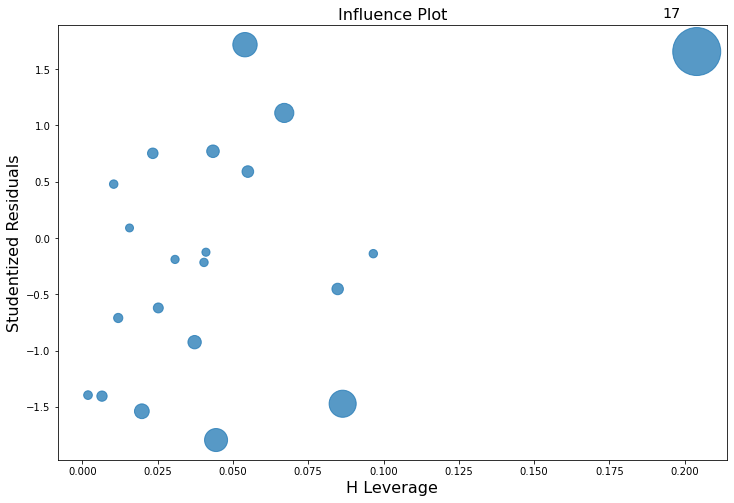

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [15]:
#### The scatter plot does not look good. The first test for Homoscedasticity the pvalue is <.05 so we fail the assumption 
#### of Homoscedasticity, but the Harvey Collier is >.05 so we pass. Also, there are big outliers influencing the data. 
#### Based on the graph abbove there must be a significant outlier after the H leverage of 0.2. We will test this with a table.

<AxesSubplot:>

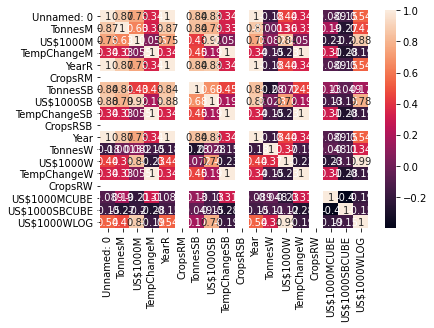

In [16]:
sns.heatmap(Analyze_data.corr(), annot=True)

In [17]:
Analyze_data.corr()

,Unnamed: 0,TonnesM,US$1000M,TempChangeM,YearR,CropsRM,TonnesSB,US$1000SB,TempChangeSB,CropsRSB,Year,TonnesW,US$1000W,TempChangeW,CropsRW,US$1000MCUBE,US$1000SBCUBE,US$1000WLOG
Unnamed: 0,1.000000,0.873690,0.751696,0.343478,1.000000,NaN,0.843573,0.876243,0.343478,NaN,1.000000,-0.177308,0.443025,0.343478,NaN,-0.089334,-0.149020,0.538317
TonnesM,0.873690,1.000000,0.633998,0.329867,0.873690,NaN,0.839477,0.792811,0.329867,NaN,0.873690,-0.001255,0.358569,0.329867,NaN,0.188555,-0.268214,0.474260
US$1000M,0.751696,0.633998,1.000000,0.055260,0.751696,NaN,0.426653,0.922645,0.055260,NaN,0.751696,0.082317,0.844458,0.055260,NaN,-0.208587,-0.204465,0.883740
TempChangeM,0.343478,0.329867,0.055260,1.000000,0.343478,NaN,0.449014,0.185411,1.000000,NaN,0.343478,-0.145539,-0.228002,1.000000,NaN,0.308693,-0.281301,-0.185244
YearR,1.000000,0.873690,0.751696,0.343478,1.000000,NaN,0.843573,0.876243,0.343478,NaN,1.000000,-0.177308,0.443025,0.343478,NaN,-0.089334,-0.149020,0.538317
CropsRM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TonnesSB,0.843573,0.839477,0.426653,0.449014,0.843573,NaN,1.000000,0.678921,0.449014,NaN,0.843573,-0.280131,0.072390,0.449014,NaN,0.127974,-0.049314,0.173257
US$1000SB,0.876243,0.792811,0.922645,0.185411,0.876243,NaN,0.678921,1.000000,0.185411,NaN,0.876243,0.028155,0.721259,0.185411,NaN,-0.133654,-0.148336,0.783010
TempChangeSB,0.343478,0.329867,0.055260,1.000000,0.343478,NaN,0.449014,0.185411,1.000000,NaN,0.343478,-0.145539,-0.228002,1.000000,NaN,0.308693,-0.281301,-0.185244
CropsRSB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_TempChangeM   cooks_d  standard_resid  hat_diag  dffits_internal  \
0          0.116413  0.013853        0.760333  0.023402         0.117698   
1         -0.026166  0.000720       -0.129694  0.041054        -0.026835   
2         -0.099990  0.010315       -0.631226  0.025234        -0.101561   
3         -0.182150  0.033418       -0.928906  0.037285        -0.182807   
4         -0.044536  0.002083       -0.222415  0.040399        -0.045636   
5         -0.033980  0.001213       -0.195417  0.030788        -0.034830   
6          0.142179  0.020896        0.599449  0.054957         0.144556   
7          0.164011  0.027458        0.778099  0.043385         0.165705   
8          0.410210  0.153342        1.638830  0.054011         0.391589   
9         -0.060860  0.003536       -1.363790  0.001898        -0.059467   
10        -0.113944  0.012381       -1.371818  0.006536        -0.111268   
11        -0.218596  0.044723       -1.488997  0.019773        -0.211478   
12        -0

In [19]:
##### The DFBETAS value is shown in the dfb_TempChangeM column, and if any value is greater than 1, then there is a problem 
#### with an influential value.

#### The DFFITS value is shown in the dffits column, and like DFBETAS, if you have a value greater than 1, this indicates 
#### a problem.

#### Leverage values are shown in the hat_diag column, and if a value is in the .2 - .5 range, there may have a moderate 
#### outlier problem, and if it is over .5, then you have a large outlier problem.

#### Studentized deleted residuals are shown in the student_resid column, and if you have a value over 2.5 or 3, there is 
#### probably have an outlier problem.

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:           US$1000MCUBE   R-squared (uncentered):      -357005649400906842112.000
Model:                            OLS   Adj. R-squared (uncentered): -374855931870952226816.000
Method:                 Least Squares   F-statistic:                                     -20.00
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                                1.00
Time:                        01:13:55   Log-Likelihood:                                 -932.17
No. Observations:                  21   AIC:                                              1866.
Df Residuals:                      20   BIC:                                              1867.
Df Model:                           1                                                          
Covariance Type:            nonrobust                                                          
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TempChangeM -1.335e+18   9.53e+17     -1.401      0.177   -3.32e+18    6.52e+17
==============================================================================
Omnibus:                        1.692   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.023
Skew:                           0.168   Prob(JB):                        0.599
Kurtosis:                       1.972   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#### Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate 
#### normality. Omnibus: 1.692 failed
#### Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to 
#### see a value close to zero here, to inidcate a normal distribution. 0.429 Pass
#### Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test discussed above. 
#### Pass
#### Kurtosis: If you have a value close to zero, this means our data is relatively normal. Failed
#### Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the 
#### presence of heteroscedasticity within your data. Failed
#### Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. Failed
#### Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. Failed
#### bCondition Number: You would like to see a condition number below 30 or so, becasue that indicates low 
#### multicollinearity. If you have higher than 30, it's time to suspect related variables! Pass

In [22]:
## Tonnes Maize

In [23]:
x = Analyze_data['TempChangeM']
y = Analyze_data['TonnesM']
model = sm.OLS(y,x).fit()

In [25]:
pred_val = model.fittedvalues.copy()
true_val = Analyze_data['TonnesM'].values.copy()
residual = true_val - pred_val

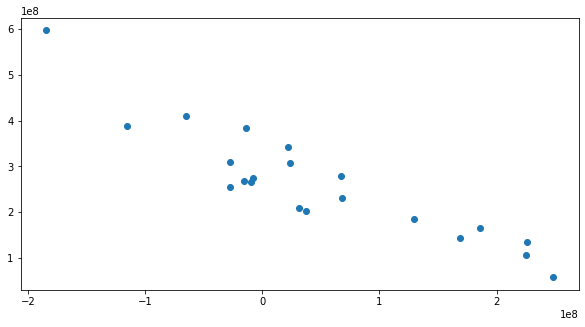

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [28]:
sms.diagnostic.het_breuschpagan(residual, Analyze_data[['TempChangeM']])

(3.40048033689438, nan, 3.864287664649057, 0.06336210182142255)

In [29]:
#### Pvalue > .05 so we fail to reject the null hypothesis

In [30]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=1.3111040850425504, pvalue=0.207257157702494)

In [31]:
#### Pvalue > .05 so we fail to reject the null hypothesis

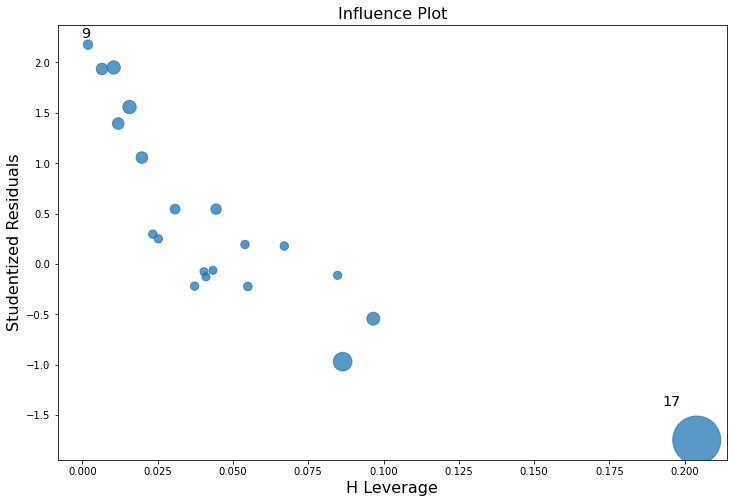

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [33]:
#### Once again, we fail the assumption of Homoscedasticity there are big outliers influencing the data. Based on the graph 
#### abbove there must be a significant outlier after the H leverage of 0.2. We will test this with a table.

In [34]:
infl2 = model.get_influence()
print(infl2.summary_frame())

    dfb_TempChangeM   cooks_d  standard_resid  hat_diag  dffits_internal  \
0          0.045953  0.002213        0.303866  0.023402         0.047038   
1         -0.026405  0.000733       -0.130876  0.041054        -0.027079   
2          0.040182  0.001694        0.255809  0.025234         0.041158   
3         -0.043180  0.001958       -0.224829  0.037285        -0.044246   
4         -0.015472  0.000252       -0.077354  0.040399        -0.015872   
5          0.097140  0.009780        0.554860  0.030788         0.098894   
6         -0.053669  0.003024       -0.228040  0.054957        -0.054991   
7         -0.013297  0.000186       -0.064054  0.043385        -0.013641   
8          0.046259  0.002248        0.198432  0.054011         0.047414   
9          0.094910  0.007589        1.997922  0.001898         0.087118   
10         0.156994  0.021671        1.814967  0.006536         0.147212   
11         0.150057  0.022387        1.053475  0.019773         0.149622   
12         0

In [35]:
#### Table doesn't indicate amy outlier issue.

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TonnesM   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              112.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                    1.13e-09
Time:                        01:24:26   Log-Likelihood:                         -420.71
No. Observations:                  21   AIC:                                      843.4
Df Residuals:                      20   BIC:                                      844.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TempChangeM  2.678e+08   2.52e+07     10.623      0.000    2.15e+08     3.2e+08
==============================================================================
Omnibus:                        0.229   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.393
Skew:                           0.187   Prob(JB):                        0.822
Kurtosis:                       2.444   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#### Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate 
#### normality. Omnibus: 0.229 pass
#### Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to 
#### see a value close to zero here, to inidcate a normal distribution. failed
#### Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test 
#### discussed above. pass
#### Kurtosis: If you have a value close to zero, this means our data is relatively normal. failed
#### Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the
#### presence of heteroscedasticity within your data. Pass
#### Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. Failed
#### Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. Failed
#### bCondition Number: You would like to see a condition number below 30 or so, becasue that indicates low 
#### multicollinearity. If you have higher than 30, it's time to suspect related variables! Pass

In [38]:
## US$1000 Soybeans

In [39]:
x = Analyze_data['TempChangeSB']
y = Analyze_data['US$1000SBCUBE']
model = sm.OLS(y,x).fit()

In [40]:
pred_val = model.fittedvalues.copy()
true_val = Analyze_data['US$1000SBCUBE'].values.copy()
residual = true_val - pred_val

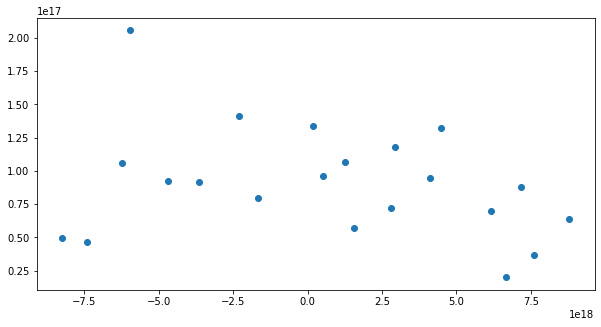

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [43]:
sms.diagnostic.het_breuschpagan(residual, Analyze_data[['TempChangeSB']])

(6.821878469932459, nan, 9.623106213986533, 0.005617889956997403)

In [44]:
#### Pvalue <.05 so we fail

In [45]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.05230251891657686, pvalue=0.9588973286570562)

In [46]:
#### Pvalue > .05 so we pass

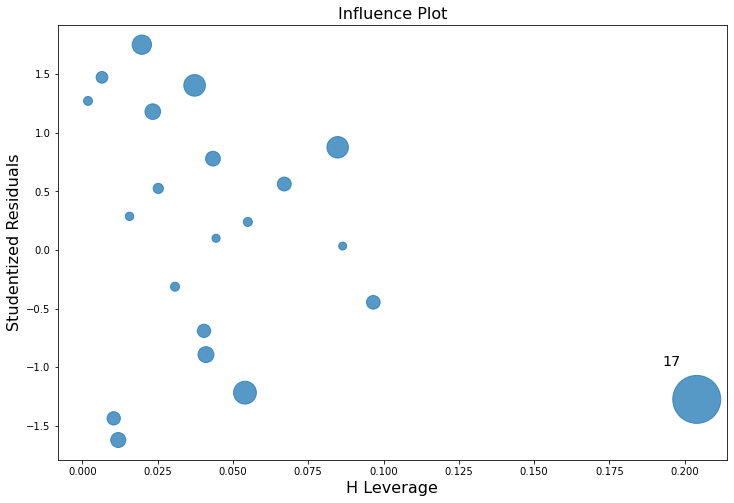

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [48]:
infl3 = model.get_influence()
print(infl3.summary_frame())

    dfb_TempChangeSB   cooks_d  standard_resid  hat_diag  dffits_internal  \
0           0.182687  0.032732        1.168743  0.023402         0.180919   
1          -0.184686  0.034459       -0.897167  0.041054        -0.185632   
2           0.084508  0.007410        0.535011  0.025234         0.086080   
3           0.276342  0.072826        1.371272  0.037285         0.269863   
4          -0.141546  0.020574       -0.699069  0.040399        -0.143437   
5          -0.055810  0.003262       -0.320440  0.030788        -0.057113   
6           0.057720  0.003496        0.245204  0.054957         0.059130   
7           0.165947  0.028090        0.787002  0.043385         0.167601   
8          -0.290809  0.082583       -1.202675  0.054011        -0.287372   
9           0.055439  0.002982        1.252258  0.001898         0.054604   
10          0.119451  0.013481        1.431468  0.006536         0.116106   
11          0.248732  0.056073        1.667257  0.019773         0.236796   

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:          US$1000SBCUBE   R-squared (uncentered):      -129602395328148619264.000
Model:                            OLS   Adj. R-squared (uncentered): -136082515094556049408.000
Method:                 Least Squares   F-statistic:                                     -20.00
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                                1.00
Time:                        01:30:38   Log-Likelihood:                                 -934.78
No. Observations:                  21   AIC:                                              1872.
Df Residuals:                      20   BIC:                                              1873.
Df Model:                           1                                                          
Covariance Type:            nonrobust                                                          
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TempChangeSB  9.231e+16   1.08e+18      0.086      0.933   -2.16e+18    2.34e+18
==============================================================================
Omnibus:                        2.898   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                1.300
Skew:                          -0.171   Prob(JB):                        0.522
Kurtosis:                       1.830   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#### Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate 
#### normality. Omnibus: 2.898 failed
#### Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to 
#### see a value close to zero here, to inidcate a normal distribution. Pass
#### Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test 
#### discussed above. passed
#### Kurtosis: If you have a value close to zero, this means our data is relatively normal. Failed
#### Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the 
#### presence of heteroscedasticity within your data. Failed
#### Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. Failed
#### Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. Failed
#### bCondition Number: You would like to see a condition number below 30 or so, becasue that indicates low 
#### multicollinearity. If you have higher than 30, it's time to suspect related variables! Pass

In [51]:
#### Tonnes SoyBean

In [52]:
x = Analyze_data['TempChangeSB']
y = Analyze_data['TonnesSB']
model = sm.OLS(y,x).fit()

In [54]:
pred_val = model.fittedvalues.copy()
true_val = Analyze_data['TonnesSB'].values.copy()
residual = true_val - pred_val

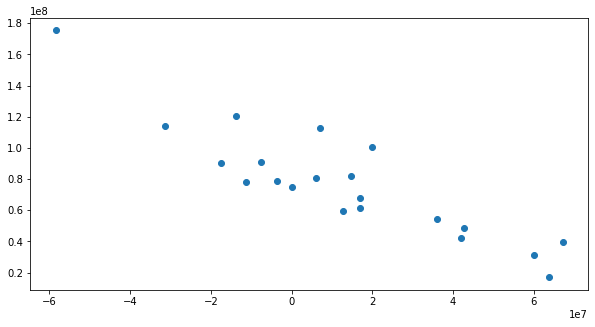

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [57]:
sms.diagnostic.het_breuschpagan(residual, Analyze_data[['TempChangeSB']])

(4.317914986396735, nan, 5.176709005949471, 0.034047370971411736)

In [58]:
#### Pvalue is < .05 Failed

In [59]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=1.2085061932244618, pvalue=0.24339478090987268)

In [60]:
#### Pvalue >.05 Passed

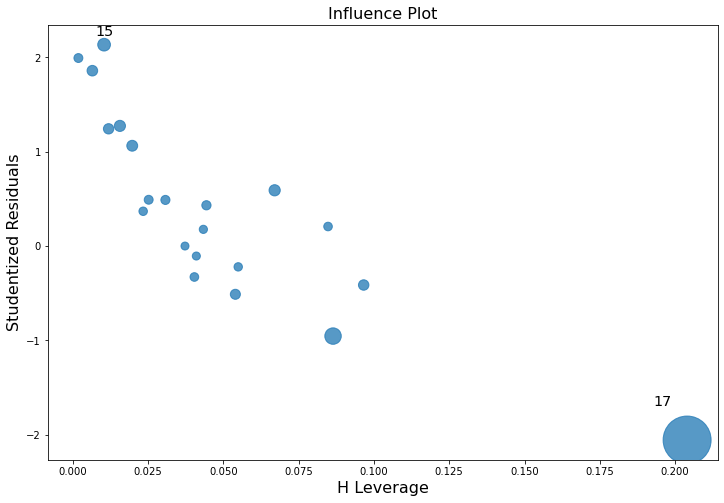

In [61]:
ig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [62]:
infl3 = model.get_influence()
print(infl3.summary_frame())

    dfb_TempChangeSB       cooks_d  standard_resid  hat_diag  dffits_internal  \
0           0.057134  3.411650e-03        0.377326  0.023402         0.058409   
1          -0.021780  4.990527e-04       -0.107968  0.041054        -0.022339   
2           0.078981  6.484072e-03        0.500474  0.025234         0.080524   
3           0.000113  1.349198e-08        0.000590  0.037285         0.000116   
4          -0.067181  4.724212e-03       -0.334982  0.040399        -0.068733   
5           0.087178  7.900555e-03        0.498705  0.030788         0.088885   
6          -0.053090  2.959387e-03       -0.225589  0.054957        -0.054400   
7           0.037759  1.498263e-03        0.181758  0.043385         0.038707   
8          -0.122051  1.546805e-02       -0.520501  0.054011        -0.124371   
9           0.086884  6.572679e-03        1.859277  0.001898         0.081072   
10          0.150732  2.023739e-02        1.753897  0.006536         0.142258   
11          0.150997  2.2652

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               TonnesSB   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              127.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                    3.89e-10
Time:                        01:36:44   Log-Likelihood:                         -393.69
No. Observations:                  21   AIC:                                      789.4
Df Residuals:                      20   BIC:                                      790.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TempChangeSB  7.869e+07   6.96e+06     11.302      0.000    6.42e+07    9.32e+07
==============================================================================
Omnibus:                        0.085   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.076
Skew:                          -0.067   Prob(JB):                        0.963
Kurtosis:                       2.737   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#### Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate 
#### normality. Omnibus: .085 Passed
#### Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to 
#### see a value close to zero here, to inidcate a normal distribution. Failed
#### Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test 
#### discussed above. passed
#### Kurtosis: If you have a value close to zero, this means our data is relatively normal. Failed
#### Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the 
#### presence of heteroscedasticity within your data. Passed
#### Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. Passed
#### Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. Failed
#### bCondition Number: You would like to see a condition number below 30 or so, becasue that indicates low 
#### multicollinearity. If you have higher than 30, it's time to suspect related variables! Pass

In [65]:
## US$1000LOG Wheat

In [67]:
x = Analyze_data['TempChangeW']
y = Analyze_data['US$1000WLOG']
model = sm.OLS(y,x).fit()

In [68]:
pred_val = model.fittedvalues.copy()
true_val = Analyze_data['US$1000WLOG'].values.copy()
residual = true_val - pred_val

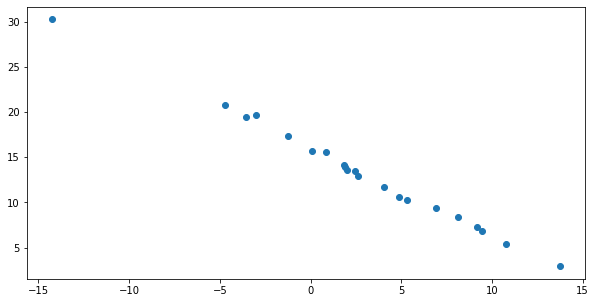

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [71]:
sms.diagnostic.het_breuschpagan(residual, Analyze_data[['TempChangeW']])

(5.43770204974305, nan, 6.988302199487533, 0.015583790007183126)

In [72]:
#### Pvalue <.05 Failed

In [73]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=0.06298774266652259, pvalue=0.9505109484924098)

In [74]:
#### Pvalue > .05 Passed

In [75]:
## Testing for outliers

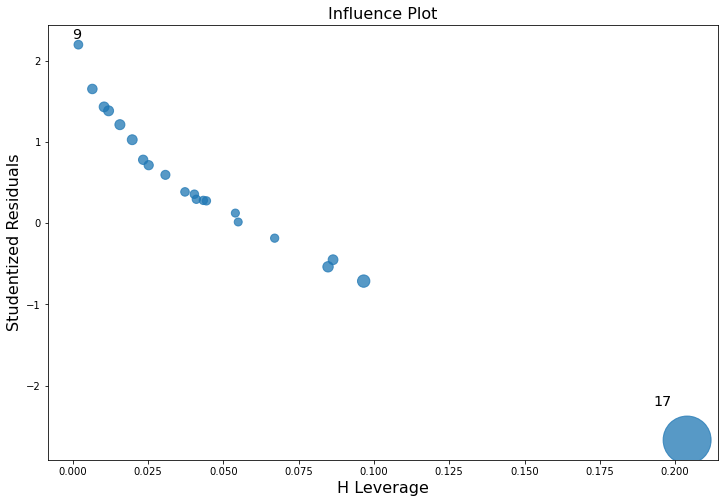

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [77]:
infl4 = model.get_influence()
print(infl4.summary_frame())

    dfb_TempChangeW   cooks_d  standard_resid  hat_diag  dffits_internal  \
0          0.120544  0.014823        0.786495  0.023402         0.121748   
1          0.060658  0.003856        0.300101  0.041054         0.062093   
2          0.114601  0.013465        0.721209  0.025234         0.116039   
3          0.075515  0.005956        0.392168  0.037285         0.077178   
4          0.072889  0.005555        0.363260  0.040399         0.074535   
5          0.105763  0.011560        0.603253  0.030788         0.107519   
6          0.003243  0.000011        0.013797  0.054957         0.003327   
7          0.059483  0.003709        0.285984  0.043385         0.060904   
8          0.029388  0.000908        0.126137  0.054011         0.030140   
9          0.095702  0.007691        2.011235  0.001898         0.087698   
10         0.133835  0.016491        1.583276  0.006536         0.128419   
11         0.145667  0.021164        1.024295  0.019773         0.145478   
12         0

In [78]:
#### Student_resid has a value over 2.5 whiich signifies that we have a outlier problem.

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            US$1000WLOG   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              96.09
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                    4.42e-09
Time:                        01:43:34   Log-Likelihood:                         -69.639
No. Observations:                  21   AIC:                                      141.3
Df Residuals:                      20   BIC:                                      142.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TempChangeW    13.5693      1.384      9.803      0.000      10.682      16.457
==============================================================================
Omnibus:                        4.363   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                2.311
Skew:                          -0.667   Prob(JB):                        0.315
Kurtosis:                       3.928   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#### Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would 
#### indicate normality. Omnibus: 4.363 failed
#### Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to 
#### see a value close to zero here, to inidcate a normal distribution. Pass
#### Skew: Again, you would like to see a value close to zero. Pass
#### Kurtosis: If you have a value close to zero, this means our data is relatively normal. Fail
#### Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the 
#### presence of heteroscedasticity within your data. Passed
#### Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. Failed
#### Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. Pass
#### bCondition Number: You would like to see a condition number below 30 or so, becasue that indicates low 
#### multicollinearity. If you have higher than 30, it's time to suspect related variables! Pass

In [81]:
#### ## Tonnes Wheat

In [82]:
x = Analyze_data['TempChangeW']
y = Analyze_data['TonnesW']
model = sm.OLS(y,x).fit()

In [83]:
pred_val = model.fittedvalues.copy()
true_val = Analyze_data['TonnesW'].values.copy()
residual = true_val - pred_val

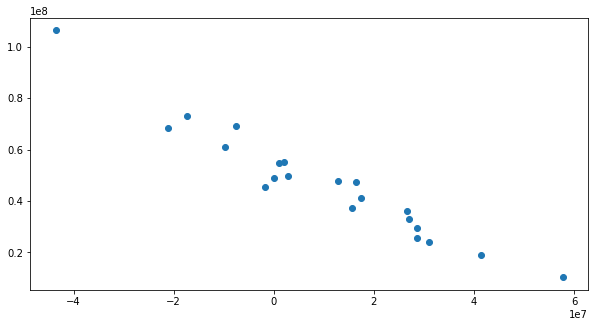

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.scatter(residual, pred_val)

In [86]:
sms.diagnostic.het_breuschpagan(residual, Analyze_data[['TempChangeW']])

(4.2728947736568506, nan, 5.108947084194294, 0.035112396374401424)

In [87]:
#### Pvalue < .05 Fail

In [88]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.14846510368786525, pvalue=0.8837225718355658)

In [89]:
#### Pvalue > .05 Pass

In [90]:
#### Testing for outliers

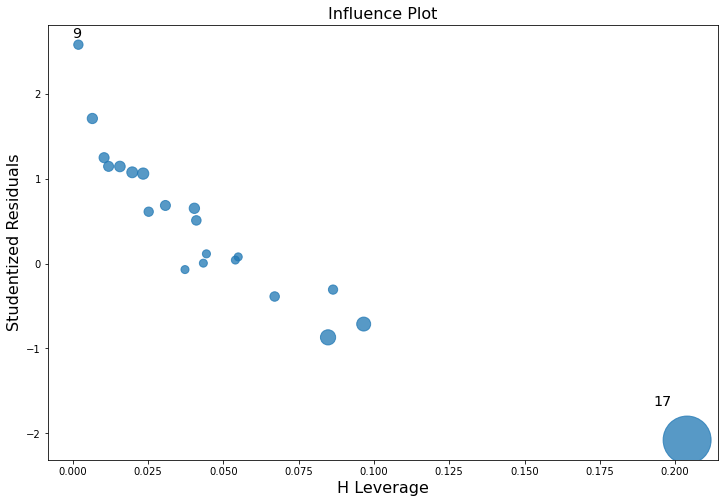

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [92]:
infl2 = model.get_influence()
print(infl2.summary_frame())

    dfb_TempChangeW   cooks_d  standard_resid  hat_diag  dffits_internal  \
0          0.164199  0.026794        1.057430  0.023402         0.163688   
1          0.105341  0.011524        0.518816  0.041054         0.107348   
2          0.098388  0.009993        0.621305  0.025234         0.099965   
3         -0.013855  0.000202       -0.072221  0.037285        -0.014213   
4          0.133717  0.018410        0.661276  0.040399         0.135683   
5          0.122112  0.015318        0.694406  0.030788         0.123765   
6          0.019053  0.000382        0.081049  0.054957         0.019545   
7          0.001111  0.000001        0.005351  0.043385         0.001139   
8          0.009958  0.000104        0.042756  0.054011         0.010216   
9          0.112494  0.009865        2.277848  0.001898         0.099323   
10         0.138711  0.017552        1.633377  0.006536         0.132483   
11         0.152809  0.023168        1.071695  0.019773         0.152210   
12         0

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TonnesW   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              86.23
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                    1.08e-08
Time:                        01:53:36   Log-Likelihood:                         -387.32
No. Observations:                  21   AIC:                                      776.6
Df Residuals:                      20   BIC:                                      777.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TempChangeW  4.775e+07   5.14e+06      9.286      0.000     3.7e+07    5.85e+07
==============================================================================
Omnibus:                        0.560   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.128
Skew:                          -0.191   Prob(JB):                        0.938
Kurtosis:                       3.012   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#### Omnibus: This is a test of skew and kurtosis of the residual. You want a value close to zero, which would indicate 
#### normality. Omnibus: 0.560 pass
#### Prob(Omnibus): This is a test indicating the probabilty that residulas are normally distributed. You would like to see 
#### a value close to zero here, to inidcate a normal distribution. failed
#### Skew: Again, you would like to see a value close to zero, and this result feeds into the Omnibus test 
#### discussed above. pass
#### Kurtosis: If you have a value close to zero, this means our data is relatively normal. failed
#### Durbin-Watson: This also tests for homoscedasticity! You would like a value between 1 and 2, otherwise you have the 
#### presence of heteroscedasticity within your data. Fail
#### Jarque-Bera (JB): This also tests skew and kurtosis. It should also be close to zero. Pass
#### Prob (JB): The probabilty that JB is normal. You would like this to be close to zero as well. Failed
#### bCondition Number: You would like to see a condition number below 30 or so, becasue that indicates low 
#### multicollinearity. If you have higher than 30, it's time to suspect related variables! Pass